Name 1: Tejas Dhopavkar

Matriculation number 1: 7075870


Name 2: Panav Raina

Matriculation number 2: 7075813

In [80]:
# import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt
from numpy import random

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

Welcome to the second part of Assignment 1. Please remember that there is another Notebook together with this :) 

In this Notebook we will start by downloading a small digits dataset and visualizing some samples. Afterwards, we will learn how to split our data to train-validation-test splits in order to train a linear classifier. Don't worry, we will use existing library for training the classifier. Our focus is mainly on splitting the data and being able to process the output of a classifier. 

You will learn how to convert raw outputs to predictions and probability distributions. We will also do a very small hyper-parameter tuning over our validation set. 

In [81]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

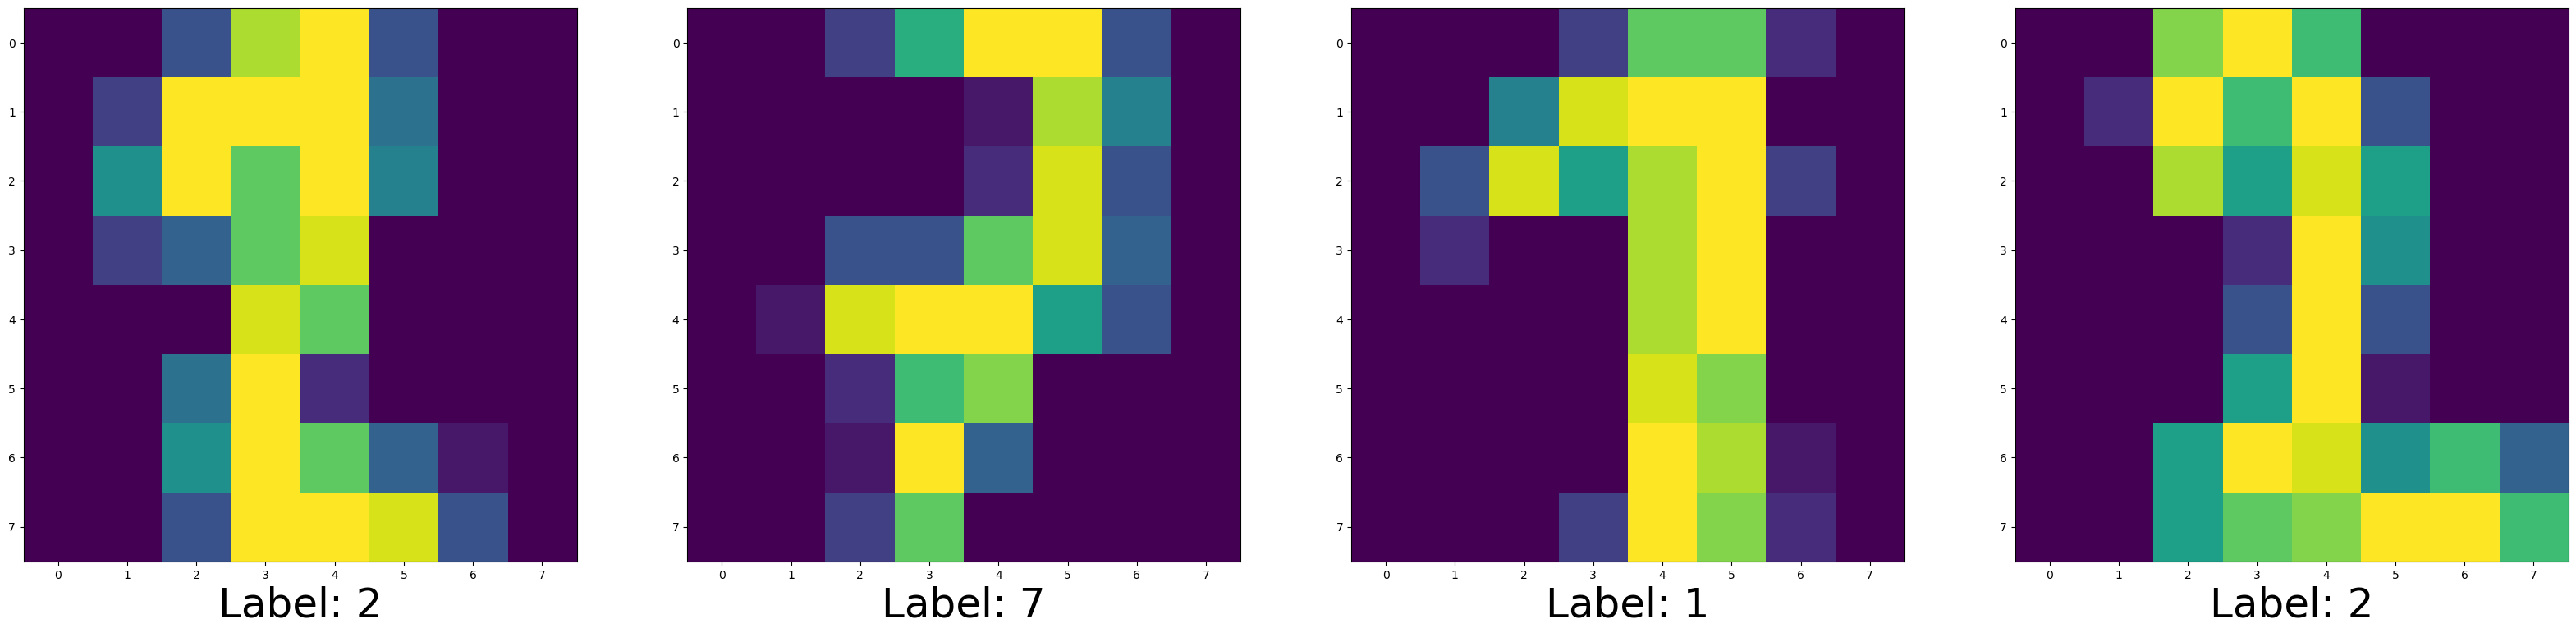

In [82]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [83]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    # 2. Split it based on the fraction
    # 3. Return (train_1, target_1, train_2, target_2of two splits
	# You `cannot` use train_test_split function provided by some library.
	# You are however welcome to look into their source code to see how one does this if it helps.

    # Copies of data and target
    dataCopy = data.copy()
    targetCopy = target.copy()

    # Calculate the sample size for training set
    # split_index indicates how many samples should be in the training set
    split_index = int(len(dataCopy) * (fraction/100))

    # Generate random indices
    training_random_indices = random.randint(len(dataCopy), size=(split_index))
    testing_random_indices = random.randint(len(dataCopy) - split_index, size=(len(dataCopy) - split_index))

    # Initialize the training and testing arrays
    data_train = data_test = np.empty((0, np.shape(dataCopy)[1]))
    target_train = target_test = np.empty((0), int)
    
    # Create arrays for training data and training labels
    for index in training_random_indices:
        data_train = np.append(data_train, np.array([dataCopy[index]]), axis=0)
        target_train = np.append(target_train, np.array([targetCopy[index]]), axis=0)

    # Delete training data and labels
    dataCopy = np.delete(dataCopy, training_random_indices, axis=0)
    targetCopy = np.delete(targetCopy, training_random_indices, axis=0)

    # Create arrays for testing data and testing labels
    for index in testing_random_indices:
        data_test = np.append(data_test, np.array([dataCopy[index]]), axis=0)
        target_test = np.append(target_test, np.array([targetCopy[index]]), axis=0)


    #######################################
    return data_train, target_train, data_test, target_test

In [84]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        # TODO First separate the test samples!
        # Side-note: In a real benchmark people often use the same official test-set so that they can
        # compare their numbers to each other. In this assignment however we simply create our own
        # randomly selectd test set from the data.
        data, digits.target, 50
    )

# Now Split the TRAIN data into 80% train and 20% validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        # TODO Now separate the cross-validation samples!
        X_trainval, y_trainval, 80
    )

In [86]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [136]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)

# Return the index of the maximum value from the outputs
preds = np.argmax(output, axis=1)
########################################

Model output has shape (180, 10)


In [137]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    
    # Calculate the count of correct predictions
    # Divide by the total number of predictions
    top1_acc = 0
    correct_prediction = 0
    for i in range(len(predictions)):
        if predictions[i] == targets[i]:
            correct_prediction +=1
    
    top1_acc = 100 * correct_prediction/len(predictions)
    
    return top1_acc # replace with accuracy
    ########################################

In [138]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 97.222


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set. Simply replace the written 0.1 value.


Please write down your tested values and results here. Which gamma value worked best on the val set?

| Gamma value | Accuracy |
| ------------|------------|
| 0.1 | 27.222 |
| 0.01 | 46.667 |
| `0.001` | `97.222` |
| 0.0001 | 95.556 |
| 0.00001 | 74.444 |

The best accuracy of 97.222% is obtained when Gamma = 0.001

In [139]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
########################################

In [140]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 96.774


In [141]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    # return per-sample softmax scores

    scores = []
    # Calculate summation of exponents
    exponent_summation = 0
    for prediction in x:
        exponent_summation += np.exp(prediction)
    
    # Divide the exponent of the score by the sum of the exponents of all scores
    for prediction in x:
        scores.append(np.exp(prediction)/exponent_summation)

    return scores

    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class
scores = softmax(preds)
########################################

Visualize some of the test predictions!

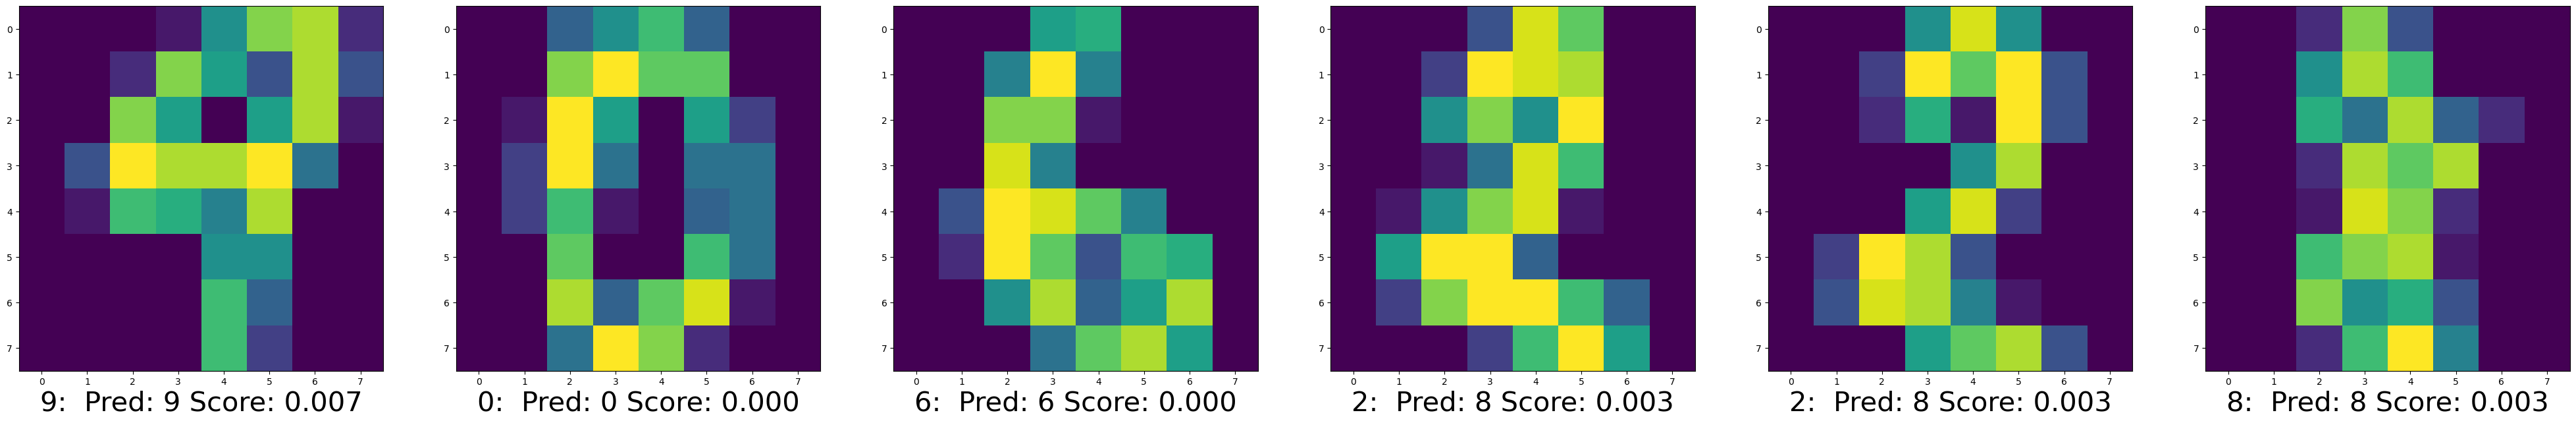

In [142]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    )

plt.show()